In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [11]:
noreuse = pd.read_csv('outputs/noreuse-stdlib-compile-profile.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('outputs/reuse-stdlib-compile-profile.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147275776
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147398656
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


In [14]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [15]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147398656,reuse_across_ctor_disabled,147275776
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111,reuse_across_ctor_disabled,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875,reuse_across_ctor_disabled,26156875
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715,reuse_across_ctor_disabled,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743,reuse_across_ctor_disabled,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Modifiers.lean,245,1079,834,77.293791
1,Lean/Eval.lean,235,1031,796,77.206596
2,Init/Control/Id.lean,132,576,444,77.083333
3,Lean/ProjFns.lean,219,768,549,71.484375
4,Lean/Compiler/ClosedTermCache.lean,222,775,553,71.354839
...,...,...,...,...,...
845,Lean/Meta/Tactic/LinearArith/Basic.lean,248,182,-66,-36.263736
846,Lean/Elab/PreDefinition/Structural/IndPred.lean,2255,1527,-728,-47.675180
847,Lean/Util/ForEachExpr.lean,464,303,-161,-53.135314
848,Lean/Elab/Frontend.lean,1224,798,-426,-53.383459


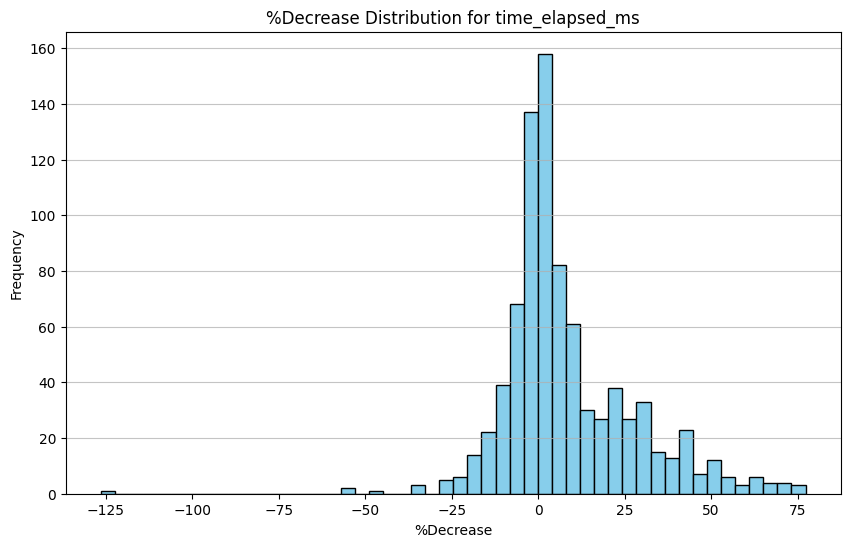

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/System/Platform.lean,88363008,89415680,1052672,1.177279
1,Lake/Build/Facets.lean,243548160,246042624,2494464,1.013834
2,Lean/Data/AssocList.lean,96079872,96997376,917504,0.945906
3,Init/Data/BitVec.lean,116719616,117772288,1052672,0.893820
4,Lake/Config/Monad.lean,248225792,250454016,2228224,0.889674
...,...,...,...,...,...
845,Lake/Config/TargetConfig.lean,249102336,247140352,-1961984,-0.793874
846,Lean/Compiler/BorrowedAnnotation.lean,122368000,121319424,-1048576,-0.864310
847,Init/Data/Format.lean,94859264,93941760,-917504,-0.976673
848,Init/Data/ToString/Macro.lean,103612416,102563840,-1048576,-1.022364


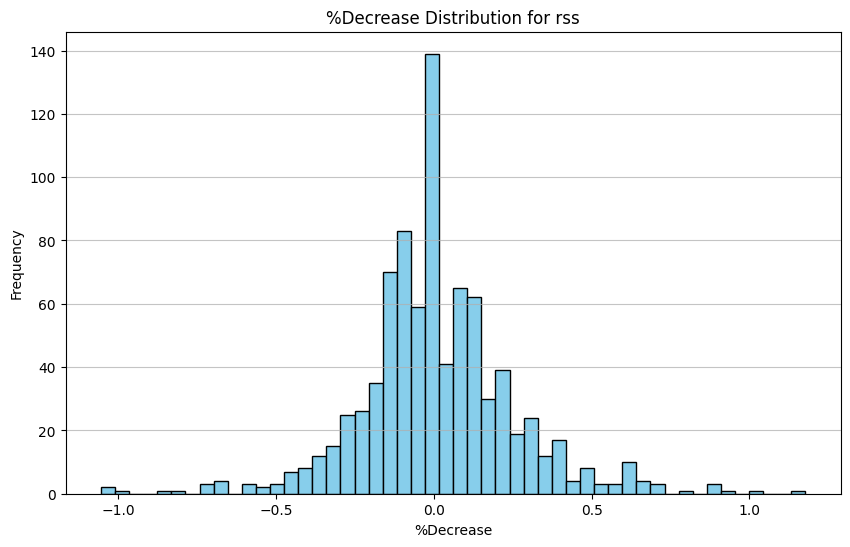

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/List/Lemmas.lean,32689222,32690017,795,0.002432
1,Init/Data/BitVec/Lemmas.lean,67573256,67574638,1382,0.002045
2,Lean/Widget/TaggedText.lean,7325922,7326001,79,0.001078
3,Init/Data/Nat/Lemmas.lean,28123733,28123953,220,0.000782
4,Lean/Elab/Tactic/Omega/MinNatAbs.lean,5632931,5632960,29,0.000515
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,19818518,19818441,-77,-0.000389
846,Init/Omega/Constraint.lean,19157375,19157282,-93,-0.000485
847,Lean/Elab/Tactic/Change.lean,3795816,3795788,-28,-0.000738
848,Init/Control/Lawful/Instances.lean,17478040,17477902,-138,-0.000790


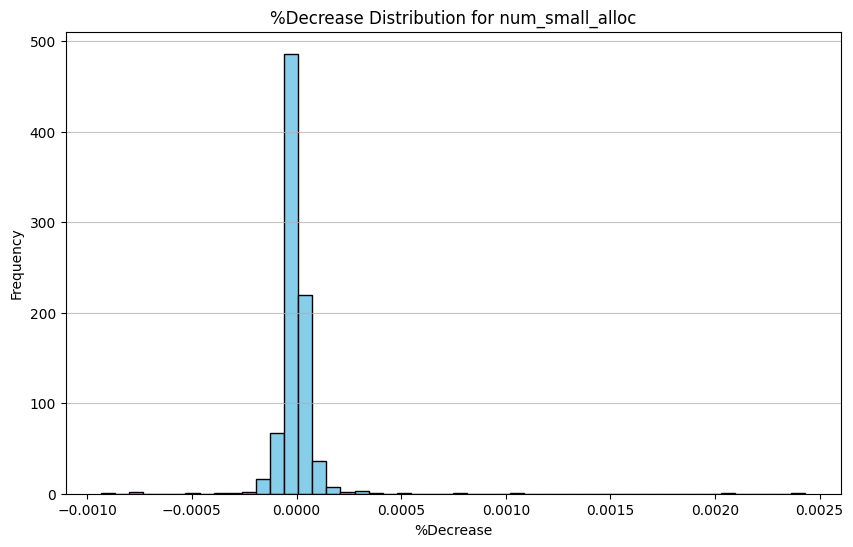

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,1273439,1273439,0,0.0
1,Lean/Meta/Tactic/Unfold.lean,144055,144055,0,0.0
2,Lean/Elab/Tactic/Basic.lean,4236396,4236396,0,0.0
3,Lean/Elab/Quotation/Precheck.lean,598559,598559,0,0.0
4,Lean/Elab/SyntheticMVars.lean,1302375,1302375,0,0.0
...,...,...,...,...,...
845,Lean/Parser/StrInterpolation.lean,64484,64484,0,0.0
846,Lean/Data/Lsp/Utf16.lean,77154,77154,0,0.0
847,Lean/LazyInitExtension.lean,54977,54977,0,0.0
848,Lean/CoreM.lean,836003,836003,0,0.0


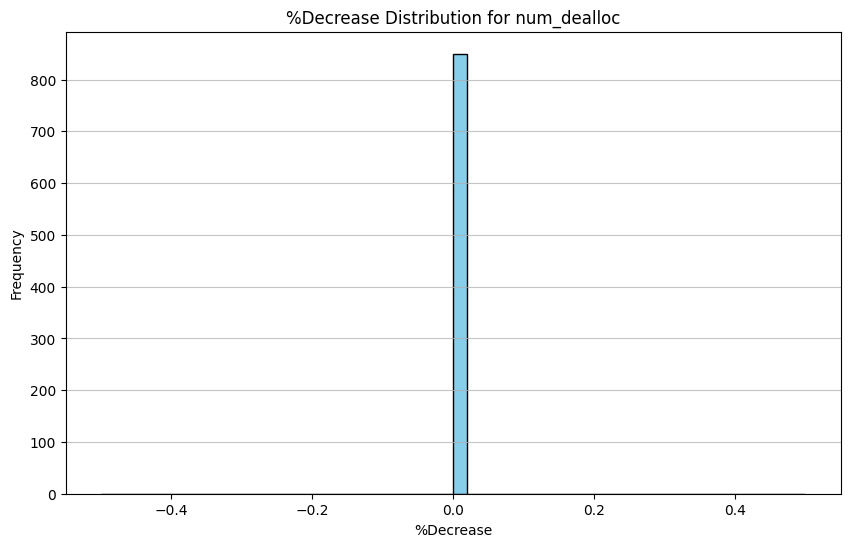

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/List/Lemmas.lean,32276591,32277381,790,0.002448
1,Init/Data/BitVec/Lemmas.lean,67093175,67094557,1382,0.002060
2,Lean/Widget/TaggedText.lean,6941754,6941833,79,0.001138
3,Init/Data/Nat/Lemmas.lean,27712224,27712444,220,0.000794
4,Lean/Elab/Tactic/Omega/MinNatAbs.lean,5300678,5300707,29,0.000547
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,19441215,19441138,-77,-0.000396
846,Init/Omega/Constraint.lean,18796786,18796693,-93,-0.000495
847,Init/Control/Lawful/Instances.lean,17127691,17127553,-138,-0.000806
848,Lean/Elab/Tactic/Change.lean,3220552,3220524,-28,-0.000869


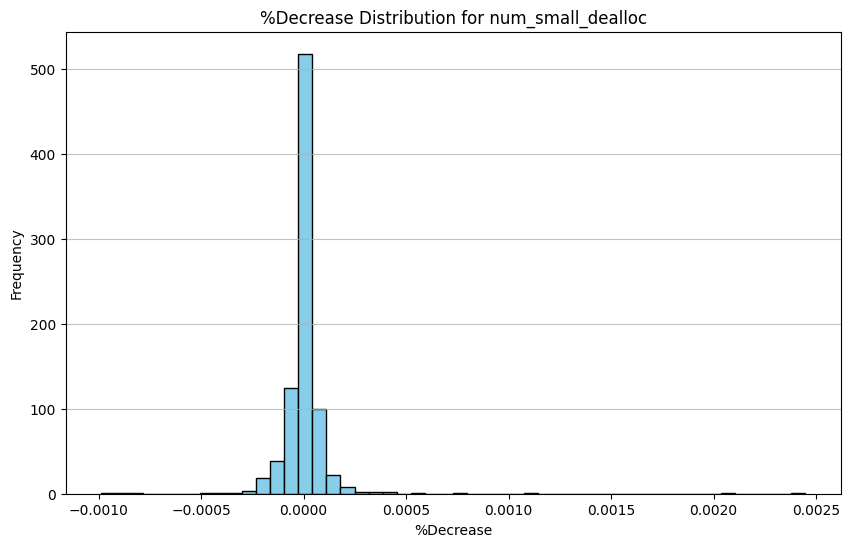

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,353579,353579,0,0.0
1,Lean/Meta/Tactic/Unfold.lean,55792,55792,0,0.0
2,Lean/Elab/Tactic/Basic.lean,546061,546061,0,0.0
3,Lean/Elab/Quotation/Precheck.lean,261895,261895,0,0.0
4,Lean/Elab/SyntheticMVars.lean,654468,654468,0,0.0
...,...,...,...,...,...
845,Lean/Parser/StrInterpolation.lean,16919,16919,0,0.0
846,Lean/Data/Lsp/Utf16.lean,18541,18541,0,0.0
847,Lean/LazyInitExtension.lean,10832,10832,0,0.0
848,Lean/CoreM.lean,494608,494608,0,0.0


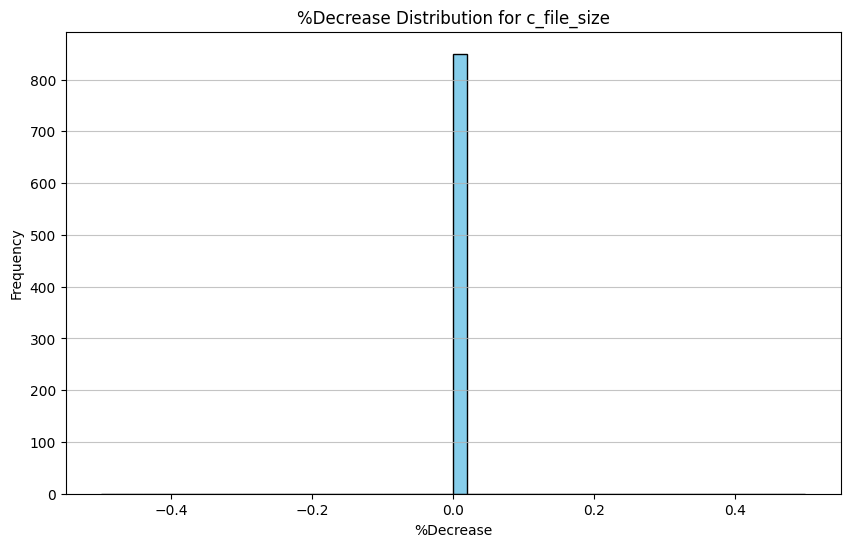

In [16]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,17212,4034116
Lean/Elab/Do.lean,14988,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,11884,5228121
Lean/Compiler/IR/EmitLLVM.lean,11433,3635984
Lean/Elab/App.lean,9582,4005911
...,...,...
Init/Data/FloatArray.lean,119,55502
Init/Data/Option/BasicAux.lean,119,59053
Init/Data/String.lean,118,55644


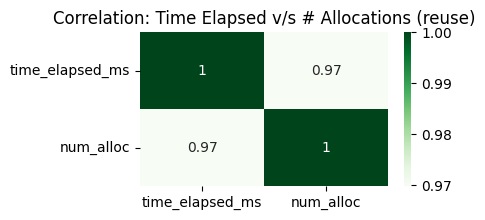

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16145,4034116
Lean/Elab/Do.lean,14705,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,12323,5228121
Lean/Compiler/IR/EmitLLVM.lean,10868,3635984
Lean/Elab/App.lean,9518,4005911
...,...,...
Init/Data/Fin/Log2.lean,135,62612
Init/Hints.lean,134,60351
Init/Data/FloatArray.lean,121,55502


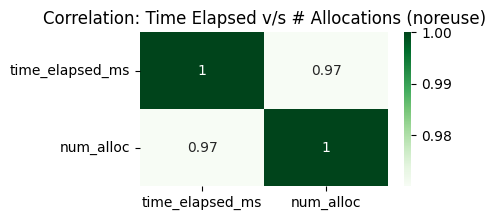

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,17212,4034116
Lean/Elab/Tactic/Omega/Frontend.lean,16145,4034116
Lean/Elab/Do.lean,14988,6328540
Lean/Elab/Do.lean,14705,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,12323,5228121
...,...,...
Init/Data/FloatArray.lean,119,55502
Init/Data/String.lean,118,55644
Init/Data/ByteArray.lean,117,55552


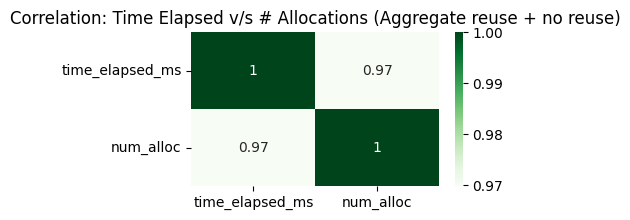

In [17]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: